In [5]:
import pandas as pd
import numpy as np

In [6]:
data = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(".\\ml-1m\\users.dat", sep= "::", engine='python', names=data)
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [7]:
data = ['movie_id', 'title', 'genre']
movies = pd.read_table(".\\ml-1m\\movies.dat", sep= "::", engine='python', encoding='ISO-8859-1', names=data)
movies

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [8]:
data = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(".\\ml-1m\\ratings.dat", sep= "::", engine='python', names=data)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [9]:
df_users = pd.DataFrame(users)
df_movies = pd.DataFrame(movies)
df_ratings = pd.DataFrame(ratings)
df_ratings_on_movie = df_ratings.merge(df_movies, on='movie_id')
df = df_ratings_on_movie.merge(df_users, on='user_id')
df

,user_id,movie_id,rating,timestamp,title,genre,gender,age,occupation,zip
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


In [10]:
df = df.drop(columns=['timestamp', 'zip', 'occupation'])
df

,user_id,movie_id,rating,title,genre,gender,age
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1
3,1,3408,4,Erin Brockovich (2000),Drama,F,1
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1
...,...,...,...,...,...,...,...
1000204,4211,3791,2,Footloose (1984),Drama,M,45
1000205,4211,3806,3,MacKenna's Gold (1969),Western,M,45
1000206,4211,3840,4,Pumpkinhead (1988),Horror,M,45
1000207,4211,3766,2,Missing in Action (1984),Action|War,M,45


In [29]:
bins = [0, 20, 50, np.inf]
category = ['young', 'adult', 'old']
df['experience'] = pd.cut(df['age'], bins, labels=category)
df

,user_id,movie_id,rating,title,genre,gender,age,experience
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,young
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,young
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,young
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,young
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,young
...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,Footloose (1984),Drama,M,45,adult
1000205,4211,3806,3,MacKenna's Gold (1969),Western,M,45,adult
1000206,4211,3840,4,Pumpkinhead (1988),Horror,M,45,adult
1000207,4211,3766,2,Missing in Action (1984),Action|War,M,45,adult


In [32]:
df_young_F = df[(df['experience'] == 'young') & (df['gender'] == 'F')]
df_young_F[['title', 'rating', 'gender']].groupby(['title', 'gender']).sum().sort_values(by = 'rating', ascending=False).head(10)

,,rating
title,gender,
American Beauty (1999),F,952
Shakespeare in Love (1998),F,750
"Princess Bride, The (1987)",F,698
"Sixth Sense, The (1999)",F,692
Toy Story (1995),F,678
Forrest Gump (1994),F,654
"Shawshank Redemption, The (1994)",F,616
Star Wars: Episode VI - Return of the Jedi (1983),F,600
"Silence of the Lambs, The (1991)",F,597


In [35]:
df_young_M = df[(df['experience'] == 'young') & (df['gender'] == 'M')]
df_young_M[['title', 'rating', 'gender']].groupby(['title', 'gender']).sum().sort_values(by = 'rating', ascending=False).head(10)

,,rating
title,gender,
American Beauty (1999),M,2689
"Matrix, The (1999)",M,2395
Star Wars: Episode V - The Empire Strikes Back (1980),M,2376
Star Wars: Episode IV - A New Hope (1977),M,2342
Star Wars: Episode VI - Return of the Jedi (1983),M,2264
Saving Private Ryan (1998),M,2176
Braveheart (1995),M,2097
Terminator 2: Judgment Day (1991),M,2054
"Sixth Sense, The (1999)",M,1992


In [38]:
df_adult_F = df[(df['experience'] == 'adult') & (df['gender'] == 'F')]
df_adult_F[['title', 'rating', 'gender']].groupby(['title', 'gender']).sum().sort_values(by = 'rating', ascending=False).head(10)

,,rating
title,gender,
American Beauty (1999),F,2841
Shakespeare in Love (1998),F,2417
"Silence of the Lambs, The (1991)",F,2301
"Sixth Sense, The (1999)",F,2161
Fargo (1996),F,2160
Star Wars: Episode IV - A New Hope (1977),F,2109
"Shawshank Redemption, The (1994)",F,2091
Schindler's List (1993),F,2026
Star Wars: Episode V - The Empire Strikes Back (1980),F,2003


In [39]:
df_adult_M = df[(df['experience'] == 'adult') & (df['gender'] == 'M')]
df_adult_M[['title', 'rating', 'gender']].groupby(['title', 'gender']).sum().sort_values(by = 'rating', ascending=False).head(10)

,,rating
title,gender,
Star Wars: Episode IV - A New Hope (1977),M,7800
American Beauty (1999),M,7562
Star Wars: Episode V - The Empire Strikes Back (1980),M,7410
Terminator 2: Judgment Day (1991),M,6732
Saving Private Ryan (1998),M,6559
Raiders of the Lost Ark (1981),M,6519
"Matrix, The (1999)",M,6454
Star Wars: Episode VI - Return of the Jedi (1983),M,6445
"Silence of the Lambs, The (1991)",M,6165


In [40]:
df_old_F = df[(df['experience'] == 'old') & (df['gender'] == 'F')]
df_old_F[['title', 'rating', 'gender']].groupby(['title', 'gender']).sum().sort_values(by = 'rating', ascending=False).head(10)

,,rating
title,gender,
American Beauty (1999),F,217
Schindler's List (1993),F,198
One Flew Over the Cuckoo's Nest (1975),F,173
Shakespeare in Love (1998),F,170
Gone with the Wind (1939),F,168
"Shawshank Redemption, The (1994)",F,139
Forrest Gump (1994),F,138
Saving Private Ryan (1998),F,131
"Godfather, The (1972)",F,130


In [41]:
df_old_M = df[(df['experience'] == 'old') & (df['gender'] == 'M')]
df_old_M[['title', 'rating', 'gender']].groupby(['title', 'gender']).sum().sort_values(by = 'rating', ascending=False).head(10)

,,rating
title,gender,
American Beauty (1999),M,539
Schindler's List (1993),M,435
"Godfather, The (1972)",M,415
Saving Private Ryan (1998),M,406
Fargo (1996),M,401
Star Wars: Episode IV - A New Hope (1977),M,395
"Silence of the Lambs, The (1991)",M,394
Shakespeare in Love (1998),M,390
Star Wars: Episode V - The Empire Strikes Back (1980),M,389


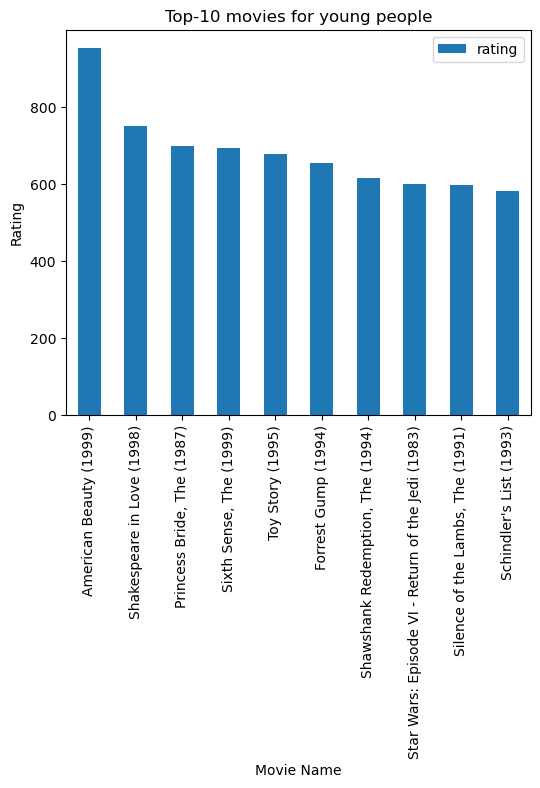

In [54]:
df_young_F = df[(df['experience'] == 'young') & (df['gender'] == 'F')]
df_top10_young_F = df_young_F[['title', 'rating']].groupby(['title']).sum().sort_values(by = 'rating', ascending=False).head(10)
plot_top10 = df_top10_young_F.plot(kind='bar', title='Top-10 movies for young people', ylabel='Rating', xlabel='Movie Name', figsize=(6, 5))
